In [96]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
from scipy import stats

In [97]:
#Задаём рабочую папку
os.chdir("/home/botiyava/learning/subjects/algo/lec5/eco228/Nursing Home Data")

In [100]:
#Читаем данные
df = pd.read_csv('data', delim_whitespace=True)


In [101]:
print(df)

    BED  MCDAYS  TDAYS  PCREV  NSAL  FEXP  RURAL
0   244     128    385  23521  5230  5334      0
1    59     155    203   9160  2459   493      1
2   120     281    392  21900  6304  6115      0
3   120     291    419  22354  6590  6346      0
4   120     238    363  17421  5362  6225      0
5    65     180    234  10531  3622   449      1
6   120     306    372  22147  4406  4998      1
7    90     214    305  14025  4173   966      1
8    96     155    169   8812  1955  1260      0
9   120     133    188  11729  3224  6442      1
10   62     148    192   8896  2409  1236      0
11  120     274    426  20987  2066  3360      1
12  116     154    321  17655  5946  4231      0
13   59     120    164   7085  1925  1280      1
14   80     261    284  13089  4166  1123      1
15  120     338    375  21453  5257  5206      1
16   80      77    133   7790  1988  4443      1
17  100     204    318  18309  4156  4585      1
18   60      97    213   8872  1914  1675      1
19  110     178    2

В начале зададим уровень значимости альфа, он будет стандартным - 0.05, т.к. мы имеем дело с финансами (а в экономике принято делать альфа = 0.05)

In [102]:
#разделяем данные на две выборки. 
#Первая - загородные больницы
#Вторая - городские больницы
x = df[df["RURAL"] == 0]["FEXP"]
y = df[df["RURAL"] == 1]["FEXP"]
x.name, y.name = "not rural", "rural"

In [103]:
#Функция, которая построит 2 гистограммы, которые будут наложены друг на друга.
#Они нам нужны для выбора критерия оценки нашей гипотезы.
def two_histograms(x,y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color="red", alpha=0.8, linestyle="dashed")
    plt.axvline(y.mean(), color="blue", alpha=0.8, linestyle="dashed")
    plt.legend([x.name, y.name])

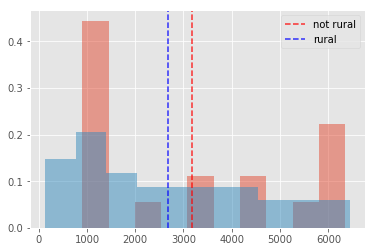

In [104]:
two_histograms(x,y)
#наблюдается ассиметрия,очень сильное отклонение формы гистограммы от колоколообразной
#формы, распределения обеих выборок существенно отличаются от нормального распределения.
#нужно использовать вариант со сравнением медиан, а это значит, что мы должны использовать критерий
#Манна-Уитни-Вилкоксона.

In [125]:
#Чтобы убедиться, что это не нормальное распределение, посмотрим на тест Шапиро-Вилка
#Видим, что распределение точно не нормальное (p < 0.05). Мы всё сделали верно. 
#Гипотеза нормальности  отвергается в обоих случаях.
from scipy.stats import shapiro
stat, p = shapiro(x)
print('Stats(x)=%.3f, p(x)=%.3f'%(stat,p))
stat, p = shapiro(y)
print('Stats(y)=%.3f, p(y)=%.3f'%(stat,p))

Stats(x)=0.733, p(x)=0.000
Stats(y)=0.748, p(y)=0.000


In [105]:
#красный график сильно отличался от синего. я решил посмотреть в чем  дело. Оказалось просто что больниц
#в городах намного больше,чем за его пределами. Ошибки никакой нет.
print(x)

0     5334
2     6115
3     6346
4     6225
8     1260
10    1236
12    4231
20     907
21    3351
23    2123
27    1064
30    4197
31    1198
34    1279
36    3524
46    1344
49    1154
51    6274
Name: not rural, dtype: int64


In [106]:
print(y)

1      493
5      449
6     4998
7      966
9     6442
11    3360
13    1280
14    1123
15    5206
16    4443
17    4585
18    1675
19    5686
22    1756
24    4531
25    2543
26    4446
28    2987
29     411
32    1209
33     137
35    1273
37    2561
38    3874
39    6402
40    1911
41    1122
42    3893
43    2212
44    2959
45    3006
47    1242
48    1484
50     245
Name: rural, dtype: int64


In [107]:
#Используем критерий Манна-Уитни для оценки
res = stats.mannwhitneyu(x,y)
print("p-value: ", res[1])
#p-value > alpha, значит гипотеза о равенстве медиан не отвергается.
#Гипотеза о равенстве медиан не отвергнута.


p-value:  0.26594759448891914


In [108]:
#Для более наглядного представления результатов анализа приведём ящиковую диаграмму,
#Построенную по сравниваемым выборкам.
x = df[df["RURAL"] == 0]["FEXP"].reset_index()
y = df[df["RURAL"] == 1]["FEXP"].reset_index()
x.name, y.name = "not rural", "rural"

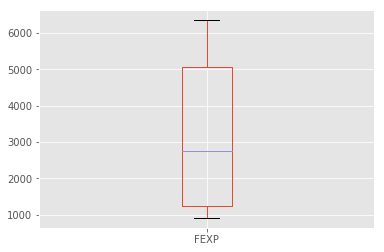

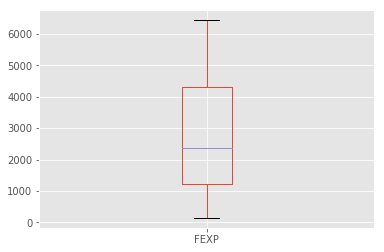

In [126]:
plt.show(x.boxplot(column=['FEXP']))
plt.show(y.boxplot(column=['FEXP']))

## Интерпретация результата
### По результатам исследования было выяснено, что разница в расходах загородных и городских больниц незначительна. Разница медиан вызвана случайными отклонениями.
